# Load the data set

In [4]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.4 MB/s eta 0:00:00a 0:00:01


In [5]:
import pandas as pd
import numpy as np
from miceforest import ImputationKernel
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
# for building linear regression models and preparing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [6]:
data=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
print("data shape:{}".format(data.shape))



data shape:(1460, 81)


In [7]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.shape

(1460, 81)

# cleaning the data set

We will drop the Id column as it is not necessary for model training.

In [9]:
data = data.drop('Id', axis=1)

In [10]:
data.columns = data.columns.str.strip()

In [11]:
data['FireplaceQu'].fillna('No Fireplace',inplace=True)
data['Alley'].fillna('No Alley',inplace=True)
data['PoolQC'].fillna('No PoolQc',inplace=True)
data['Fence'].fillna('No Fence',inplace=True)
data['MiscFeature'].fillna('No MiscFeature',inplace=True)

In [12]:
data['GarageType'].fillna('No Garage',inplace=True)
data['GarageYrBlt'].fillna(0,inplace=True)
data['GarageFinish'].fillna('No Garage',inplace=True)
data['GarageQual'].fillna('No Garage',inplace=True)
data['GarageCond'].fillna('No Garage',inplace=True)


In [13]:
#convert object into category
data = pd.concat([
        data.select_dtypes([], ['object']),
        data.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
        ], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   LotFrontage    1201 non-null   float64 
 2   LotArea        1460 non-null   int64   
 3   OverallQual    1460 non-null   int64   
 4   OverallCond    1460 non-null   int64   
 5   YearBuilt      1460 non-null   int64   
 6   YearRemodAdd   1460 non-null   int64   
 7   MasVnrArea     1452 non-null   float64 
 8   BsmtFinSF1     1460 non-null   int64   
 9   BsmtFinSF2     1460 non-null   int64   
 10  BsmtUnfSF      1460 non-null   int64   
 11  TotalBsmtSF    1460 non-null   int64   
 12  1stFlrSF       1460 non-null   int64   
 13  2ndFlrSF       1460 non-null   int64   
 14  LowQualFinSF   1460 non-null   int64   
 15  GrLivArea      1460 non-null   int64   
 16  BsmtFullBath   1460 non-null   int64   
 17  BsmtHalfBath   1460 non-null   in

In [14]:
null= data.isna().sum() 
print(null[null != 0])

LotFrontage     259
MasVnrArea        8
MasVnrType      872
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
dtype: int64


In [15]:
#data=data.drop(["Alley","PoolQC","Fence","MiscFeature","FireplaceQu"],axis=1)
#null= data.isna().sum() 
#print(null[null != 0])

In [16]:
#This is a multivariate imputation technique, 
#meaning that the missing information is filled by taking into consideration the information from the other columns. 
mice_kernel = ImputationKernel(
data = data,
save_all_iterations = True,
random_state = 64
)


/opt/conda/lib/python3.10/site-packages/miceforest/ImputationKernel.py:371: UserWarning: [Utilities,Neighborhood,Condition1,Condition2,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterCond,BsmtCond,Heating,HeatingQC,Electrical,Functional,GarageCond,PoolQC,MiscFeature,SaleType] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


In [17]:
#we run the kernel on the data for two iterations, and finally, create the imputed data.
mice_kernel.mice(2)
data = mice_kernel.complete_data()

In [18]:
null= data.isna().sum() 
print(null[null != 0])

Series([], dtype: int64)


In [19]:
numeric_data=pd.DataFrame()
for i in range(len(data.columns)):
    types=((data.dtypes).to_frame())
    typei=types[0][i]
    if (typei=="int64")| (typei=="float64"):
       numeric_data[types.index[i]]=data[types.index[i]] 
numeric_data=numeric_data.drop(["SalePrice"],axis=1)
outlier_addressed=numeric_data[["LotArea","LotFrontage","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageArea"]]
list_of_outliers=outlier_addressed.columns

for i in list_of_outliers:
    Q1=data.loc[:,i].quantile(0.25)
    Q3=data.loc[:,i].quantile(0.75)
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR
    temp1=data[data.loc[:,i]>upper]
    temp2=data[data.loc[:,i]<lower]
    data.loc[temp1.index,i]=upper
    data.loc[temp2.index,i]=lower

## House Price Distribution

In [20]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.004452,9647.388014,6.099315,5.575342,1971.267808,1984.865753,103.867123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,19.863236,3594.356399,1.382997,1.112799,30.202904,20.645407,181.137795,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,28.500000,1481.500000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,81.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,112.500000,17673.500000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


/tmp/ipykernel_33/2929200922.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.SalePrice, color='b', bins=100, hist_kws={'alpha': 0.3})


<Axes: xlabel='SalePrice', ylabel='Density'>

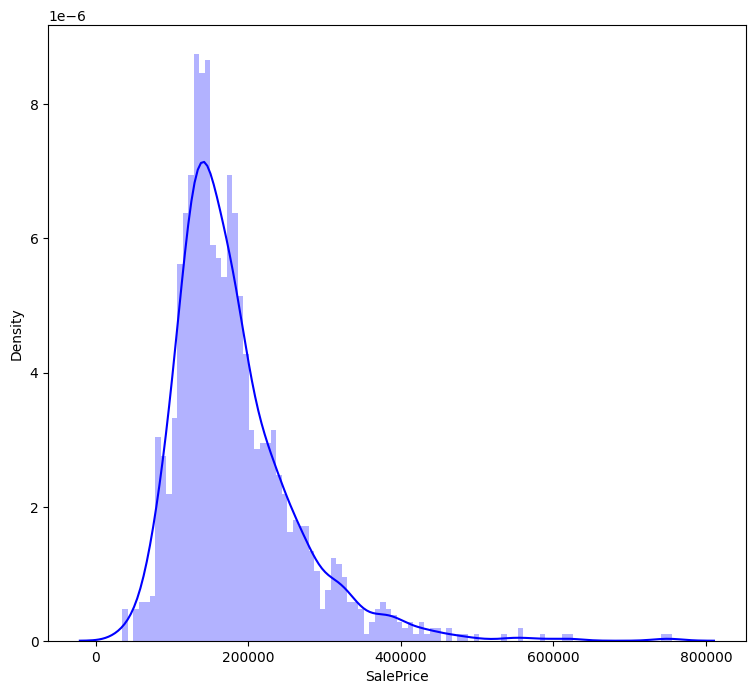

In [21]:
plt.figure(figsize=(9, 8))
sns.distplot(data.SalePrice, color='b', bins=100, hist_kws={'alpha': 0.3})

## Numerical data distribution¶


In [22]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450.0,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600.0,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250.0,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550.0,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260.0,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


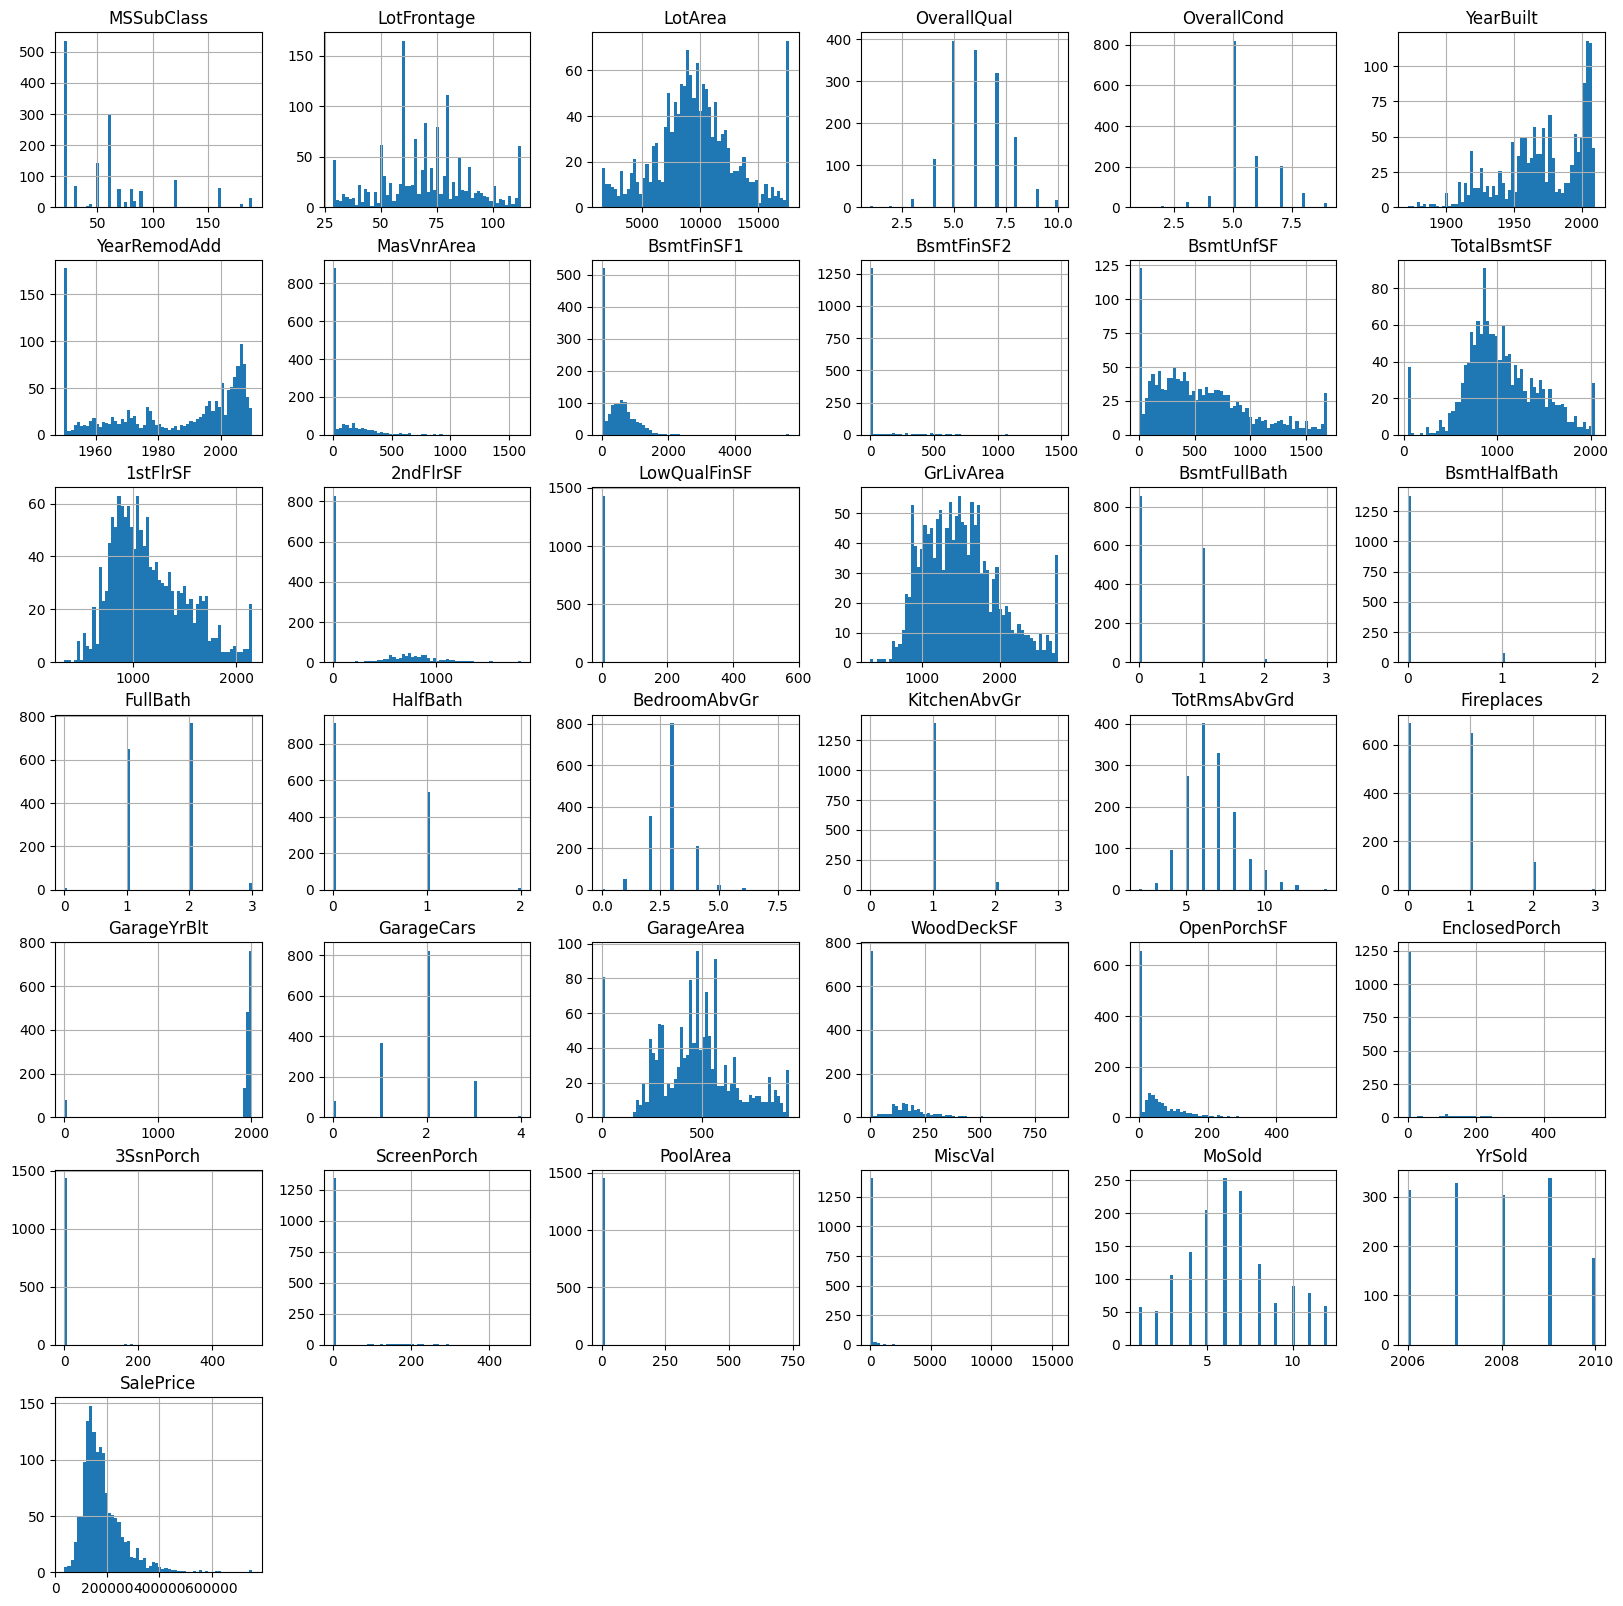

In [23]:
#  plot the distribution for all the numerical features.
df_num.hist(bins=60,figsize=(20,20));

In [24]:
# checking string-enccoded categorical data
#Selecting only the category columns
category_columns=data.select_dtypes(include='category')
#display the value counts for each category column
for column in category_columns:
    print("Value counts for column'{column}':")
    print(data[column].value_counts())
    print()

Value counts for column'{column}':
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Value counts for column'{column}':
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Value counts for column'{column}':
Alley
No Alley    1369
Grvl          50
Pave          41
Name: count, dtype: int64

Value counts for column'{column}':
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

Value counts for column'{column}':
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

Value counts for column'{column}':
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

Value counts for column'{column}':
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

Value counts for column'{column}':
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Value counts for column'{column}':
N

In [25]:
data=data.replace('Twnhs','TwnhsI')

In [26]:
data[['MSSubClass','OverallQual','OverallCond']]=data[['MSSubClass','OverallQual','OverallCond']].astype(str)


# Encoding and features engineering

In [27]:
# split into x, y
y_set=data["SalePrice"]
x_train=data.drop(['SalePrice'],axis=1)

print(f"the shape of the inputs x is: {x_train.shape}")
print(f"the shape of the targets y is: {y_set.shape}")

the shape of the inputs x is: (1460, 79)
the shape of the targets y is: (1460,)


In [28]:
data_dummies=pd.get_dummies(x_train)

In [29]:
data_dummies.shape

(1460, 327)

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
select=SelectFromModel(RandomForestRegressor(n_estimators=100,random_state=42),threshold='median')


In [31]:
select.fit(data_dummies,y_set)

SelectFromModel(estimator=RandomForestRegressor(random_state=42),
                threshold='median')

In [32]:
x_set_l1=select.transform(data_dummies)

In [33]:
print(f"x_train.shape: {x_train.shape}")
print(f"x_train_l1: {x_set_l1.shape}")

x_train.shape: (1460, 79)
x_train_l1: (1460, 164)


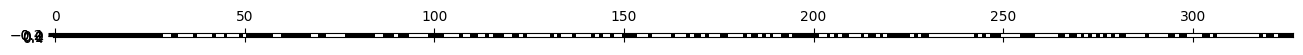

In [34]:
mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')


# Building  Models

In [35]:
x_train, x_val, y_train, y_val = train_test_split(x_set_l1, y_set,test_size=0.20, random_state=42)
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the validation set (input) is: {x_val.shape}")
print(f"the shape of the validation set (target) is: {y_val.shape}\n")

the shape of the training set (input) is: (1168, 164)
the shape of the training set (target) is: (1168,)

the shape of the validation set (input) is: (292, 164)
the shape of the validation set (target) is: (292,)



In [36]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(learning_rate=0.06,random_state=0)
gbrt.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.06, random_state=0)

In [37]:
print("accuracy on training set:{:.3f}".format(gbrt.score(x_train,y_train)))
print("accuracy on validation set:{:.3f}".format(gbrt.score(x_val,y_val)))

accuracy on training set:0.952
accuracy on validation set:0.888


In [38]:
predect_val=gbrt.predict(x_val)

In [39]:
r2_score(predect_val,y_val)

0.8576224043968894

In [40]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_val, predect_val)
rmse_gbrt = np.sqrt(mse)
rmse_gbrt

29338.79703334886

# Loading the test data

In [41]:
data_test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
print("x_test shape:{}".format(data_test.shape))

x_test shape:(1459, 80)


In [42]:
data_test.columns = data_test.columns.str.strip()

In [43]:
null= data_test.isna().sum() 
print(null[null != 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [44]:
data_test['FireplaceQu'].fillna('No Fireplace',inplace=True)
data_test['Alley'].fillna('No Alley',inplace=True)
data_test['PoolQC'].fillna('No PoolQc',inplace=True)
data_test['Fence'].fillna('No Fence',inplace=True)
data_test['MiscFeature'].fillna('No MiscFeature',inplace=True)

In [45]:
#convert object into category
data_test = pd.concat([
        data_test.select_dtypes([], ['object']),
        data_test.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
        ], axis=1)



In [46]:
#This is a multivariate imputation technique, 
#meaning that the missing information is filled by taking into consideration the information from the other columns. 
mice_kernel = ImputationKernel(
data = data_test,
save_all_iterations = True,
random_state = 64
)

/opt/conda/lib/python3.10/site-packages/miceforest/ImputationKernel.py:371: UserWarning: [Condition2,RoofMatl,Exterior1st,Exterior2nd,ExterCond,Foundation,Heating,HeatingQC,Functional,GarageQual,GarageCond,PoolQC,Fence,MiscFeature] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


In [47]:
mice_kernel.mice(2)
data_test = mice_kernel.complete_data()

In [48]:
null= data_test.isna().sum() 
print(null[null != 0])

Series([], dtype: int64)


In [49]:
Id_test = data_test['Id']
data_test = data_test.drop('Id', axis=1)

In [50]:
numeric_data=pd.DataFrame()
for i in range(len(data_test.columns)):
    types=((data_test.dtypes).to_frame())
    typei=types[0][i]
    if (typei=="int64")| (typei=="float64"):
       numeric_data[types.index[i]]=data_test[types.index[i]] 
outlier_addressed=numeric_data[["LotArea","LotFrontage","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageArea"]]
list_of_outliers=outlier_addressed.columns

for i in list_of_outliers:
    Q1=data_test.loc[:,i].quantile(0.25)
    Q3=data_test.loc[:,i].quantile(0.75)
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR
    temp1=data_test[data_test.loc[:,i]>upper]
    temp2=data_test[data_test.loc[:,i]<lower]
    data_test.loc[temp1.index,i]=upper
    data_test.loc[temp2.index,i]=lower

In [51]:
category_columns=data_test.select_dtypes(include='category')
#display the value counts for each category column
for column in category_columns:
    print("Value counts for column'{column}':")
    print(data_test[column].value_counts())
    print()

Value counts for column'{column}':
MSZoning
RL         1117
RM          242
FV           74
C (all)      16
RH           10
Name: count, dtype: int64

Value counts for column'{column}':
Street
Pave    1453
Grvl       6
Name: count, dtype: int64

Value counts for column'{column}':
Alley
No Alley    1352
Grvl          70
Pave          37
Name: count, dtype: int64

Value counts for column'{column}':
LotShape
Reg    934
IR1    484
IR2     35
IR3      6
Name: count, dtype: int64

Value counts for column'{column}':
LandContour
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: count, dtype: int64

Value counts for column'{column}':
Utilities
AllPub    1459
Name: count, dtype: int64

Value counts for column'{column}':
LotConfig
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: count, dtype: int64

Value counts for column'{column}':
LandSlope
Gtl    1396
Mod      60
Sev       3
Name: count, dtype: int64

Value counts for column'{column}':
Neighborhood
NAm

In [52]:
data_test=data_test.replace('Twnhs','TwnhsI')
data_test[['MSSubClass','OverallQual','OverallCond']]=data_test[['MSSubClass','OverallQual','OverallCond']].astype(str)

In [53]:
data_test.shape

(1459, 79)

In [54]:
test_dummies=pd.get_dummies(data_test)
test_dummies.shape

(1459, 306)

In [55]:
# Find columns that are different
diff_cols=list(set(data_dummies)-set(test_dummies))
diff_cols

['GarageCond_No Garage',
 'Exterior2nd_Other',
 'Exterior1st_ImStucc',
 'Utilities_NoSeWa',
 'Heating_Floor',
 'RoofMatl_Membran',
 'Condition2_RRNn',
 'GarageFinish_No Garage',
 'RoofMatl_Metal',
 'GarageType_No Garage',
 'PoolQC_Fa',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'GarageQual_No Garage',
 'Electrical_Mix',
 'GarageQual_Ex',
 'MiscFeature_TenC',
 'Condition2_RRAe',
 'Exterior1st_Stone',
 'RoofMatl_Roll',
 'Condition2_RRAn',
 'RoofMatl_ClyTile']

In [56]:
# Set Values of different columns to 0 in the test data
for col in diff_cols:
    test_dummies[col]=0
test_dummies.shape

(1459, 328)

In [57]:
# save columns with names matching the selected features
selected_columns=[column for column in test_dummies.columns if column in select.get_feature_names_out()]

In [58]:
# create new test data with the selected columns
selected_df=test_dummies[selected_columns]
selected_df.shape

(1459, 164)

In [59]:
# Create a dictionary to map the original column names to new numerical column names
column_mapping={column: index for index,column in enumerate(selected_df.columns)}

In [60]:
# Rename the columns using the dictionary mapping
selected_df.rename(columns=column_mapping,inplace=True)

/tmp/ipykernel_33/2320107982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.rename(columns=column_mapping,inplace=True)


In [61]:
selected_df.head()

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
0,80.0,11622.0,1961,1961,0.0,468.0,144.0,270.0,882.0,896,...,False,True,False,False,True,False,False,False,True,False
1,81.0,14267.0,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,...,False,False,True,False,True,False,False,False,True,False
2,74.0,13830.0,1997,1998,0.0,791.0,0.0,137.0,928.0,928,...,False,True,False,False,True,False,False,False,True,False
3,78.0,9978.0,1998,1998,20.0,602.0,0.0,324.0,926.0,926,...,False,False,True,False,True,False,False,False,True,False
4,43.0,5005.0,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,...,False,False,True,False,True,False,False,False,True,False


In [62]:
y_hat_gbrt=gbrt.predict(selected_df)

In [63]:
output_gbrt = pd.DataFrame({'Id': Id_test,
                       'SalePrice': y_hat_gbrt})
output_gbrt.head()

,Id,SalePrice
0,1461,125017.458299
1,1462,162338.120964
2,1463,186296.934902
3,1464,186085.239887
4,1465,193311.609482


In [65]:
y_hat_gbrt.mean()

179578.75605508732

In [66]:
output_gbrt.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
